HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

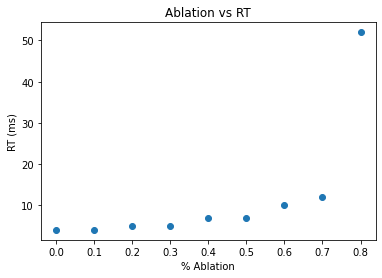

In [19]:
# July 4, 2021
# accuracy v speed
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random
import pickle
# Stewart change
# if decrease number neurons become less accurate?
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.0005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1
feedback = 0.99
threshold = 0.8 

import csv

with spa.Network(seed = 0) as model:
    noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
    vocab = spa.Vocabulary(d)
    vocab.populate("RED; BLUE; GREEN; NOISE")
    BLUE = vocab.parse('BLUE')
    RED = vocab.parse('RED')
    GREEN = vocab.parse('GREEN')
    NOISE = vocab.parse('NOISE')
    
    Color = spa.State(vocab,  subdimensions = 16, neurons_per_dimension = 50,\
                      represent_cc_identity = False, feedback_synapse = 0.1, feedback = feedback)
    nengo.Connection(noise,Color.input, synapse = 0.01)
        
    def input(t):
        if t < 1:
            return RED 
        elif t < 2:
            return BLUE 
        elif t < 3:
            return GREEN 
        else:
            return  '0'
    input_transcode = spa.Transcode(function = input, output_vocab = vocab)
    input_transcode >> Color
    probe_Color = nengo.Probe(Color.output, synapse = 0.01)

    def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000


    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
    pickle.dump(numbers, open("June30", "wb"))

    #---------------------------------------------------------------------Recalculate for 10% Ablation
    proportion_ablate = 0.1
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers1  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers1, open("June30", "wb"))

    # Could do all this in a loop...
     #---------------------------------------------------------------------Recalculate for 20% Ablation
    proportion_ablate = 0.2
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers2  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers2, open("June30", "wb"))
    

     #---------------------------------------------------------------------Recalculate for 30% Ablation
    proportion_ablate = 0.3
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers3  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers3, open("June30", "wb"))
    
    
     #---------------------------------------------------------------------Recalculate for 40% Ablation
    proportion_ablate = 0.4
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers4  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers4, open("June30", "wb"))
    
       #---------------------------------------------------------------------Recalculate for 50% Ablation
    proportion_ablate = 0.5
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers5  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers5, open("June30", "wb"))
           #---------------------------------------------------------------------Recalculate for 60% Ablation
    proportion_ablate = 0.6
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers6  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers6, open("June30", "wb"))
              #---------------------------------------------------------------------Recalculate for 70% Ablation
    proportion_ablate = 0.7
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers7  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers7, open("June30", "wb"))
    
        #---------------------------------------------------------------------Recalculate for 80% Ablation
    proportion_ablate = 0.8
    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(1)  
    
    numbers8  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers8, open("June30", "wb"))
   
    #-------------
    # Get values where data crosses threshold at different loss percents
    value = 0.8
    absolute_val_array = np.abs(numbers[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index 
    BasePoint = closest_element

    absolute_val_array = np.abs(numbers1[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index 
    ablation10 = closest_element   

    absolute_val_array = np.abs(numbers2[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation20 = closest_element

    absolute_val_array = np.abs(numbers3[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation30 = closest_element 

    absolute_val_array = np.abs(numbers4[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation40 = closest_element

    absolute_val_array = np.abs(numbers5[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation50 = closest_element
    
    absolute_val_array = np.abs(numbers6[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation60 = closest_element
    
    absolute_val_array = np.abs(numbers7[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation70 = closest_element
    
    absolute_val_array = np.abs(numbers8[:,0] - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = smallest_difference_index
    ablation80 = closest_element
    
    # Plot
    Points = [BasePoint, ablation10, ablation20, ablation30, ablation40, ablation50, ablation60, ablation70, ablation80]
    xvals = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] 
    plt.figure()
    plt.scatter(xvals,Points) 
    plt.xlabel("% Ablation")
    plt.ylabel("RT (ms)")
    plt.title("Ablation vs RT")
    plt.savefig('AblationvsRT.svg')  
    plt.savefig('AblationvsRT.png') 

     